In [85]:
import kagglehub

path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\uciml\iris\versions\2


In [86]:
import  numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [87]:
df = pd.read_csv('iris.csv')    

In [88]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [89]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


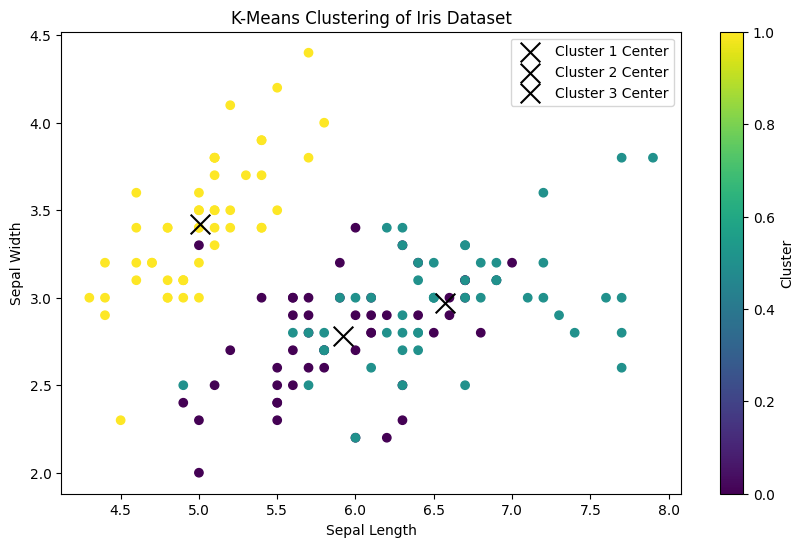

In [90]:
# perform clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df.drop(columns=['Species']))
# add cluster labels to the dataframe
df['cluster'] = kmeans.labels_
# display the first few rows of the dataframe
print(df.head())
# visualize the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['cluster'], marker='o')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
#label the clusters
for i in range(3):
    plt.scatter(df[df['cluster'] == i]['SepalLengthCm'].mean(), 
                df[df['cluster'] == i]['SepalWidthCm'].mean(), 
                marker='x', s=200, color='black', label=f'Cluster {i+1} Center')  # Fixed f-string
plt.legend()

plt.colorbar(label='Cluster')


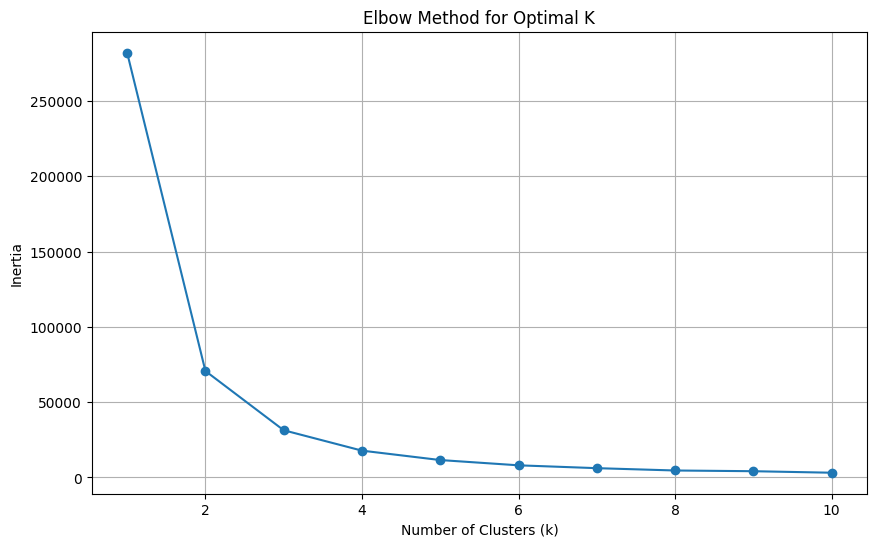

In [91]:
#plot elbow curve
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop(columns=['Species']))
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
xy =(elbow_curve_x, elbow_curve_y) = (range(1, 11), inertia)

plt.grid()
plt.show()

